# Week 09 Independent Lab: Inferential Statistics

Author: Hali Evans    
Course: BGEN632    
Purpose: Practive statistical approaches in python.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [4]:
# set working directory
os.chdir("/Users/halievans/Documents/BGEN632/week9labs/data")  # add your filepath within the quotes
os.getcwd()  # confirm change

'/Users/halievans/Documents/BGEN632/week9labs/data'

In [5]:
# load data
ectd_df = pd.read_csv("ect_data.txt", sep="\t")
ectd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


## Linear and Multiple Regression

In [7]:
# run regression
lin_reg = smf.ols('intent1_01 ~ attitude1_01 + attitude1_02 + peruse01 + peruse02 + satis01', ectd_df).fit() # establish intent1_01 response variable attitude1_02 etc. explanatory variables
lin_reg.summary() # display summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.01
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           9.38e-31
Time:                        10:07:46   Log-Likelihood:                -211.54
No. Observations:                 201   AIC:                             435.1
Df Residuals:                     195   BIC:                             454.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9931      0.354      2.808      0.005       0.296       1.691
attitude1_01     0.3127      0.095      3.285      0.001       0.125       0.500
attitude1_02     0.1529      0.076      2.014      0.045       0.003       0.303
peruse01         0.2427      0.072      3.374      0.001       0.101       0.385
peruse02        -0.0165      0.066     -0.250      0.803      -0.147       0.114
satis01          0.1885      0.056      3.378      0.001       0.078       0.299
==============================================================================
Omnibus:                       62.562   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.131
Skew:                          -1.101   Prob(JB):                     1.11e-65
Kurtosis:                       8.556   Cond. No.                         94.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='satis01', ylabel='intent1_01'>

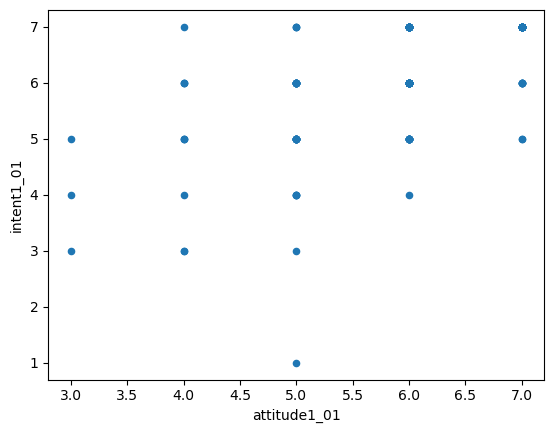

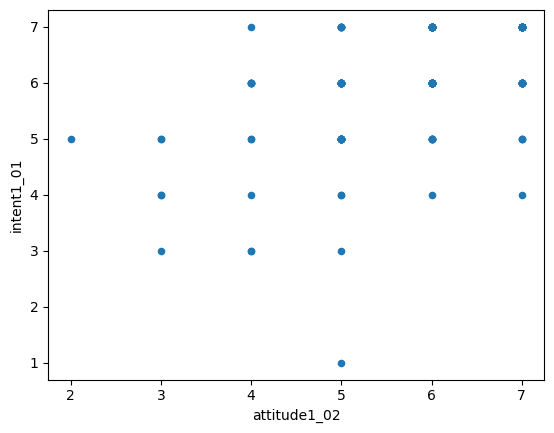

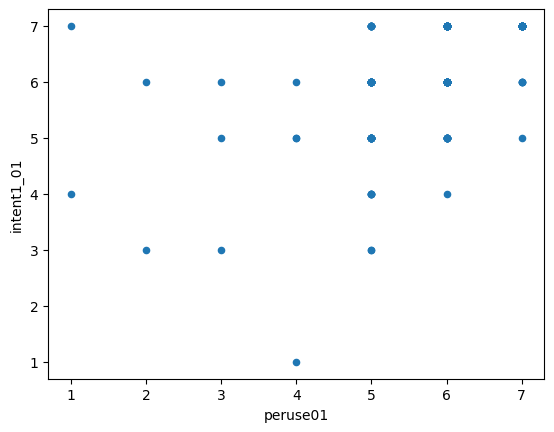

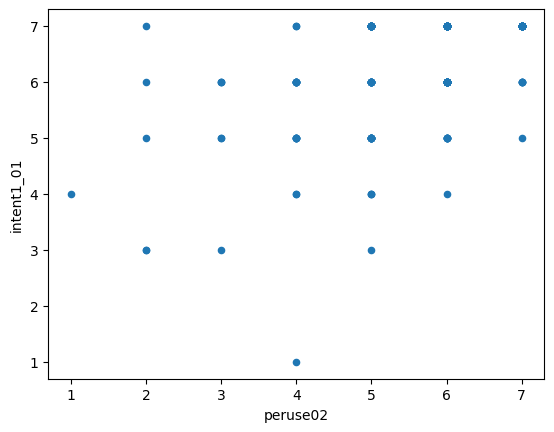

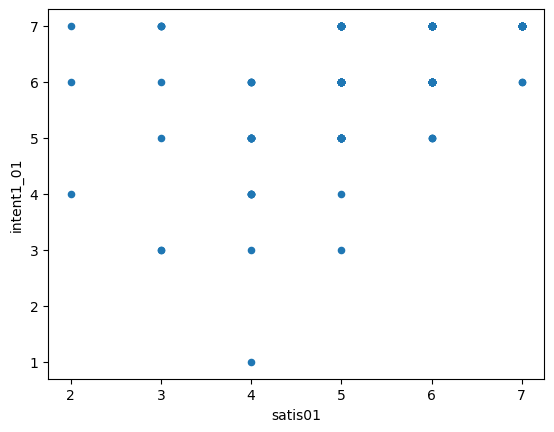

In [8]:
# create scatterplot based on information established above to test for linearity
ectd_df.plot.scatter(x='attitude1_01', y='intent1_01')
ectd_df.plot.scatter(x='attitude1_02', y='intent1_01')
ectd_df.plot.scatter(x='peruse01', y='intent1_01')
ectd_df.plot.scatter(x='peruse02', y='intent1_01')
ectd_df.plot.scatter(x='satis01', y='intent1_01')

#### Linearity: Non-Linear Relationship to any of the explanatory variables chosen. 

In [10]:
# run correlation analysis for all variables
ectd_df.corr()

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
attitude1_01,1.000000,0.781832,0.748347,0.709922,0.666356,0.687054,0.654357,0.684226,0.576265,0.593120,0.622239,0.591388,0.569608,0.549134,0.483329,0.515116
attitude1_02,0.781832,1.000000,0.660611,0.622986,0.603616,0.704362,0.647626,0.650416,0.480259,0.547582,0.615780,0.551287,0.513672,0.517255,0.466889,0.523213
attitude1_03,0.748347,0.660611,1.000000,0.858235,0.519099,0.571588,0.471573,0.612550,0.453128,0.483051,0.544584,0.511677,0.519945,0.545646,0.463918,0.539753
attitude1_04,0.709922,0.622986,0.858235,1.000000,0.512032,0.560253,0.483636,0.581335,0.454046,0.492102,0.537477,0.495368,0.515158,0.518164,0.423812,0.478193
intent1_01,0.666356,0.603616,0.519099,0.512032,1.000000,0.886908,0.827830,0.757793,0.566642,0.529681,0.595103,0.488655,0.545688,0.500534,0.430458,0.494192
intent1_02,0.687054,0.704362,0.571588,0.560253,0.886908,1.000000,0.832684,0.786367,0.517334,0.489604,0.584902,0.478759,0.518394,0.505258,0.471791,0.508628
intent1_03,0.654357,0.647626,0.471573,0.483636,0.827830,0.832684,1.000000,0.722675,0.537531,0.552217,0.581282,0.513861,0.529800,0.466569,0.441605,0.472635
intent1_04,0.684226,0.650416,0.612550,0.581335,0.757793,0.786367,0.722675,1.000000,0.497286,0.521588,0.544137,0.491533,0.590820,0.555600,0.460866,0.628003
peruse01,0.576265,0.480259,0.453128,0.454046,0.566642,0.517334,0.537531,0.497286,1.000000,0.746810,0.753397,0.683090,0.399931,0.321710,0.198159,0.295438
peruse02,0.593120,0.547582,0.483051,0.492102,0.529681,0.489604,0.552217,0.521588,0.746810,1.000000,0.732724,0.728517,0.483252,0.423262,0.287002,0.391069


In [11]:
# run correlation analysis based on information established above to test for collinearity.
p1 = pearsonr(ectd_df.intent1_01, ectd_df.attitude1_01)
print(f"Corr between intent1_01 and attitude1_01: {p1}")
p2 = pearsonr(ectd_df.intent1_01, ectd_df.attitude1_02)
print(f"Corr between intent1_01 and attitude1_02: {p2}")
p3 = pearsonr(ectd_df.intent1_01, ectd_df.peruse01)
print(f"Corr between intent1_01 and peruse01: {p3}")
p4 = pearsonr(ectd_df.intent1_01, ectd_df.peruse02)
print(f"Corr between intent1_01 and peruse02: {p4}")
p5 = pearsonr(ectd_df.intent1_01, ectd_df.satis01)
print(f"Corr between intent1_01 and satis01: {p5}")

Corr between intent1_01 and attitude1_01: PearsonRResult(statistic=0.6663562202246984, pvalue=3.615422482603545e-27)
Corr between intent1_01 and attitude1_02: PearsonRResult(statistic=0.6036161039889788, pvalue=2.4408895712743144e-21)
Corr between intent1_01 and peruse01: PearsonRResult(statistic=0.566642209808584, pvalue=1.819442799871855e-18)
Corr between intent1_01 and peruse02: PearsonRResult(statistic=0.5296812843719172, pvalue=6.214444421360338e-16)
Corr between intent1_01 and satis01: PearsonRResult(statistic=0.5456884402524719, pvalue=5.4250597019044415e-17)


#### Collinearity: moderately strong pearson correlation relationship between variables chosen.

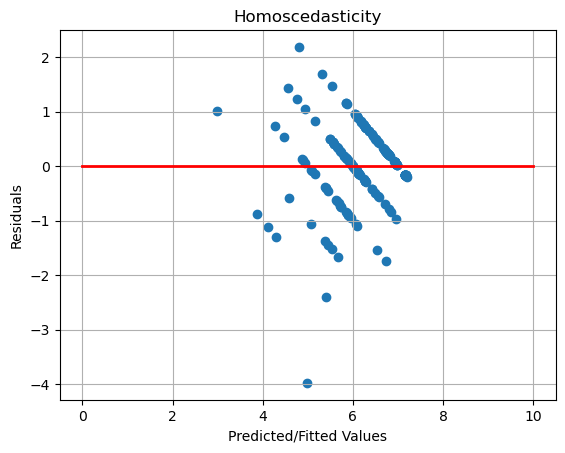

In [13]:
# linear regression model
line_reg_2 = smf.ols('intent1_01 ~ attitude1_01 + attitude1_02 + peruse01 + peruse02 + satis01', data=ectd_df).fit()

# create plot to assess homoscedasticity
plt.scatter(line_reg_2.fittedvalues, line_reg_2.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.plot([0, 10], [0, 0], 'red', lw=2) # add red line
plt.grid(True)
plt.show()

#### Homoscedasticity: the data points on the graph are no distributed evenly there appears to be a concentration to the right and facing downward. 

In [15]:
# display summary results of regression object
line_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.01
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           9.38e-31
Time:                        10:07:47   Log-Likelihood:                -211.54
No. Observations:                 201   AIC:                             435.1
Df Residuals:                     195   BIC:                             454.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9931      0.354      2.808      0.005       0.296       1.691
attitude1_01     0.3127      0.095      3.285      0.001       0.125       0.500
attitude1_02     0.1529      0.076      2.014      0.045       0.003       0.303
peruse01         0.2427      0.072      3.374      0.001       0.101       0.385
peruse02        -0.0165      0.066     -0.250      0.803      -0.147       0.114
satis01          0.1885      0.056      3.378      0.001       0.078       0.299
==============================================================================
Omnibus:                       62.562   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.131
Skew:                          -1.101   Prob(JB):                     1.11e-65
Kurtosis:                       8.556   Cond. No.                         94.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Independence: value of the Durbin-Watson test is acceptable at 1.934 between 1.5 to 2.5.

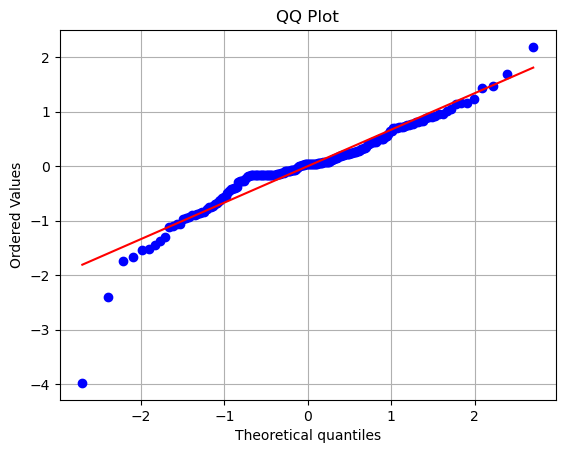

In [17]:
# linear regression model
line_reg_2 = smf.ols('intent1_01 ~ attitude1_01 + attitude1_02 + peruse01 + peruse02 + satis01', data=ectd_df).fit()

# create plot to assess normality
sts.probplot(line_reg_2.resid, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.grid(True)
plt.show()

#### Normality: the line is fairly straight representing a normal distribution.

## Assess models F-test and T-test from lin_reg_2 and interpret results
F-statistic: 45.01    
Prob (F-statistic): 9.38e-31    
The high value F-Stat indicates a significant amount of variance in intent1_01 compared to what would be expected by chance. 

Based on the t-test results from the regression analysis, four variables were found to be statistically significant predictors of (intent1_01). Attitude1_01 had the strongest positive effect, indicating that individuals with better attitudes are significantly more likely to express intent to act. Peruse01 also showed a significant positive relationship, suggesting that higher levels of user interaction are associated with greater behavioral intention. Satis01 was another strong predictor, highlighting that more satisfied individuals are more inclined to continue or intend to engage in the behavior. Finally, Attitude1_02 showed a smaller but still significant positive effect, potentially capturing a secondary dimension of attitude that also contributes to intention. Together, these variables point to the importance of fostering positive attitudes, enhancing satisfaction, and encouraging user engagement to influence behavioral intentions effectively. Knowing that attitude and satisfaction are two significant variables helps from a business perspetive as satisfied users will lead to word of mouth recommendation which is a free form of advertising while attitude influences the likelihood to intent. 
